In [67]:
#read vaccination progress csv file into python
#load required packages
# tweets with a link at the end have been cut off
import re
import seaborn as sns

In [68]:
import pandas as pd

url = 'https://github.com/AlexHumfrey/Python_Coursework/raw/main/vaccination_all_tweets.csv'
twit_vac_data = pd.read_csv(url)   
#twit_vac_data.head()

In [69]:
type(twit_vac_data)

pandas.core.frame.DataFrame

In [64]:
#twit_vac_data.head()

#twit_vac_data.tail()

#random sample of 5 rows from dataframe
twit_vac_data.sample(n=5, random_state = 1)

# select rows and columns to view
#twit_vac_data.iloc[10:20,10:14]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
45064,1379124926427324416,ocean cryptid,NaN,bold of you to assume you’ve perceived me BLM She/they,2009-03-28 22:01:42,220,556,41022,False,2021-04-05 17:33:00,Made my appt for my first dose of the shotll be fully vaccinated by the middle of May andm so happycould cry,['moderna'],Twitter for iPhone,0,7,False
2951,1349417388576546816,TheRag,Ragbag Of Reviews And Insights,siya@mmvii.co.za/heelextension@gmail.com,2019-02-11 18:11:23,488,5010,40,False,2021-01-13 18:05:51,Plans To Purchase 300 million More Vaccines,"['EU', 'Covid19', 'covidvaccines', 'Pfizer']",Twitter Web App,1,0,False
44002,1377879796722507777,Shen Shiwei沈诗伟,"Beijing, China","Report BRI,Africa,CPEC; Africa fellow in Univ; Years in Africa; Charhar Inst. N.S Korea study;Analyst on China overseas political&economic stakes.Personal view",2012-05-23 02:53:47,33175,4074,2799,True,2021-04-02 07:05:17,The second shipment of COVID 19 vaccine was received at Buenos Aires airport,"['China', 'Sinopharm', 'Argentina']",Twitter for iPhone,16,57,False
18733,1366421056349564928,le changement est certain,"Warangal,Telangana","Mind filled earlier with old thoughts, now it is to change the mind.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMadhwa at core",2009-09-19 10:26:18,1358,1198,2168,False,2021-03-01 16:12:21,Parallel Phase 3 trials on at different clinical sites may be compiling data may out soon by this month end,NaN,Twitter for Android,0,0,False
51368,1381231313202597892,Anthony Field,"Radlett, England","Arsenal season ticket holder, UK Miami Dolfan, lawyer and family man....",2010-10-03 14:29:52,407,554,206,False,2021-04-11 13:03:01,I receivedtext message on Friday night to book my second dose Got appointment for the following morning and had,NaN,Twitter for iPhone,0,5,False


In [70]:
print('Dataset size:',twit_vac_data.shape)
print('Columns are:',twit_vac_data.columns)
print('DataFrame Info: ',twit_vac_data.info())

Dataset size: (56585, 16)
Columns are: Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56585 entries, 0 to 56584
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                56585 non-null  int64 
 1   user_name         56585 non-null  object
 2   user_location     43499 non-null  object
 3   user_description  52698 non-null  object
 4   user_created      56585 non-null  object
 5   user_followers    56585 non-null  int64 
 6   user_friends      56585 non-null  int64 
 7   user_favourites   56585 non-null  int64 
 8   user_verified     56585 non-null  bool  
 9   date              56585 non-null  object
 10  text              56585 n

In [71]:
#list of variables
list(twit_vac_data)

['id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet']

In [54]:
#rename df columns
#twit_vac_data.rename(columns={'text','TEXT'}, inplace=TRUE)


In [55]:
#select columns to work with for our purposes
#specify chunks of columns, last number in the range not included in the generated list of numbers

#twit_vac_data2 = twit_vac_data.iloc[:,np.r_[0:3, 15:19, 27, 100, 103:107]]

#twit_vac_data2.head()

In [56]:

#twit_vac_data.shape
# summary statistics of a specific column
#twit_vac_data[["..."]].describe()

In [73]:
#preprocessing twitter data

twit_vac = twit_vac_data

#Remove twitter handlers
twit_vac.text = twit_vac.text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
twit_vac.text = twit_vac.text.apply(lambda x:re.sub(r'\B#\S+','',x))


# Remove URLS
twit_vac.text = twit_vac.text.apply(lambda x:re.sub(r"http\S+", "", x))
#twit_vac_data.text = twit_vac_data.text.apply(lambda x:re.sub(r"https\S+", "", x))

# Remove all the special characters
twit_vac.text = twit_vac.text.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
twit_vac.text = twit_vac.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
twit_vac.text = twit_vac.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
pd.options.display.max_colwidth = 280


In [74]:
#twit_vac_data.text.head(30)
twit_vac.text.sample(n=5)

33520                                        The is to receive his first dose of the after reassuring the public
32035                                                     Y ay Just got mylove the 21rst century Thanks and team
31204                                                                     I received my 2nd vaccine today Woohoo
6533     Have been bedridden the whole day following my second dose of the vaccine and wouldnhave it any other w
17330                                                    All News About CoronaVirus Vaccine Covid 19 Vaccination
Name: text, dtype: object

In [42]:
import matplotlib.pyplot as plt

In [87]:
#worldcloud vizualisation


def plot_cloud(wordcloud):
    tweet_All = " ".join(review for review in twit_vac.text)
    # Set figure size
    plt.figure(figsize=(40, 40))
    # Display image
    plt.imshow(wordcloud, interpolation ='bilinear') 
    #plt.set_title('Tweets', fontsize=30)
    # No axis details
    plt.axis("off");

In [89]:

#add custom stop words 
STOPWORDS.update(['done', 'amp'])
print(STOPWORDS)

{"weren't", 'what', 'up', 'we', 'each', "when's", 'further', 'r', "i've", 'also', 'just', 'my', 'when', 'does', 'an', "you'll", "you've", 'over', 'some', 'your', 'therefore', 'you', 'be', 'if', "wouldn't", 'www', "hadn't", 'all', "he's", 'ours', 'i', 'he', 'himself', 'because', 'nor', "i'd", 'our', 'her', 'most', 'since', "why's", 'them', 'herself', "wasn't", "they'll", "here's", 'both', "we've", 'below', 'had', 'a', 'other', 'ought', 'only', 'out', "she'd", 'they', 'against', 'after', 'get', 'having', 'has', 'in', 'cannot', 'that', 'ourselves', 'to', 'any', 'is', 'such', 'than', 'shall', 'own', 'amp', 'too', 'then', 'during', "they're", 'more', 'through', 'the', 'yours', "there's", 'by', 'again', 'those', 'else', 'http', 'com', "it's", 'k', 'their', "hasn't", 'theirs', 'there', 'under', "isn't", "can't", "haven't", 'here', 'me', 'are', 'above', "shan't", 'where', 'who', 'have', 'being', 'about', 'between', "she'll", 'few', 'while', 'do', "he'd", 'him', 'whom', "we're", 'his', 'been', 

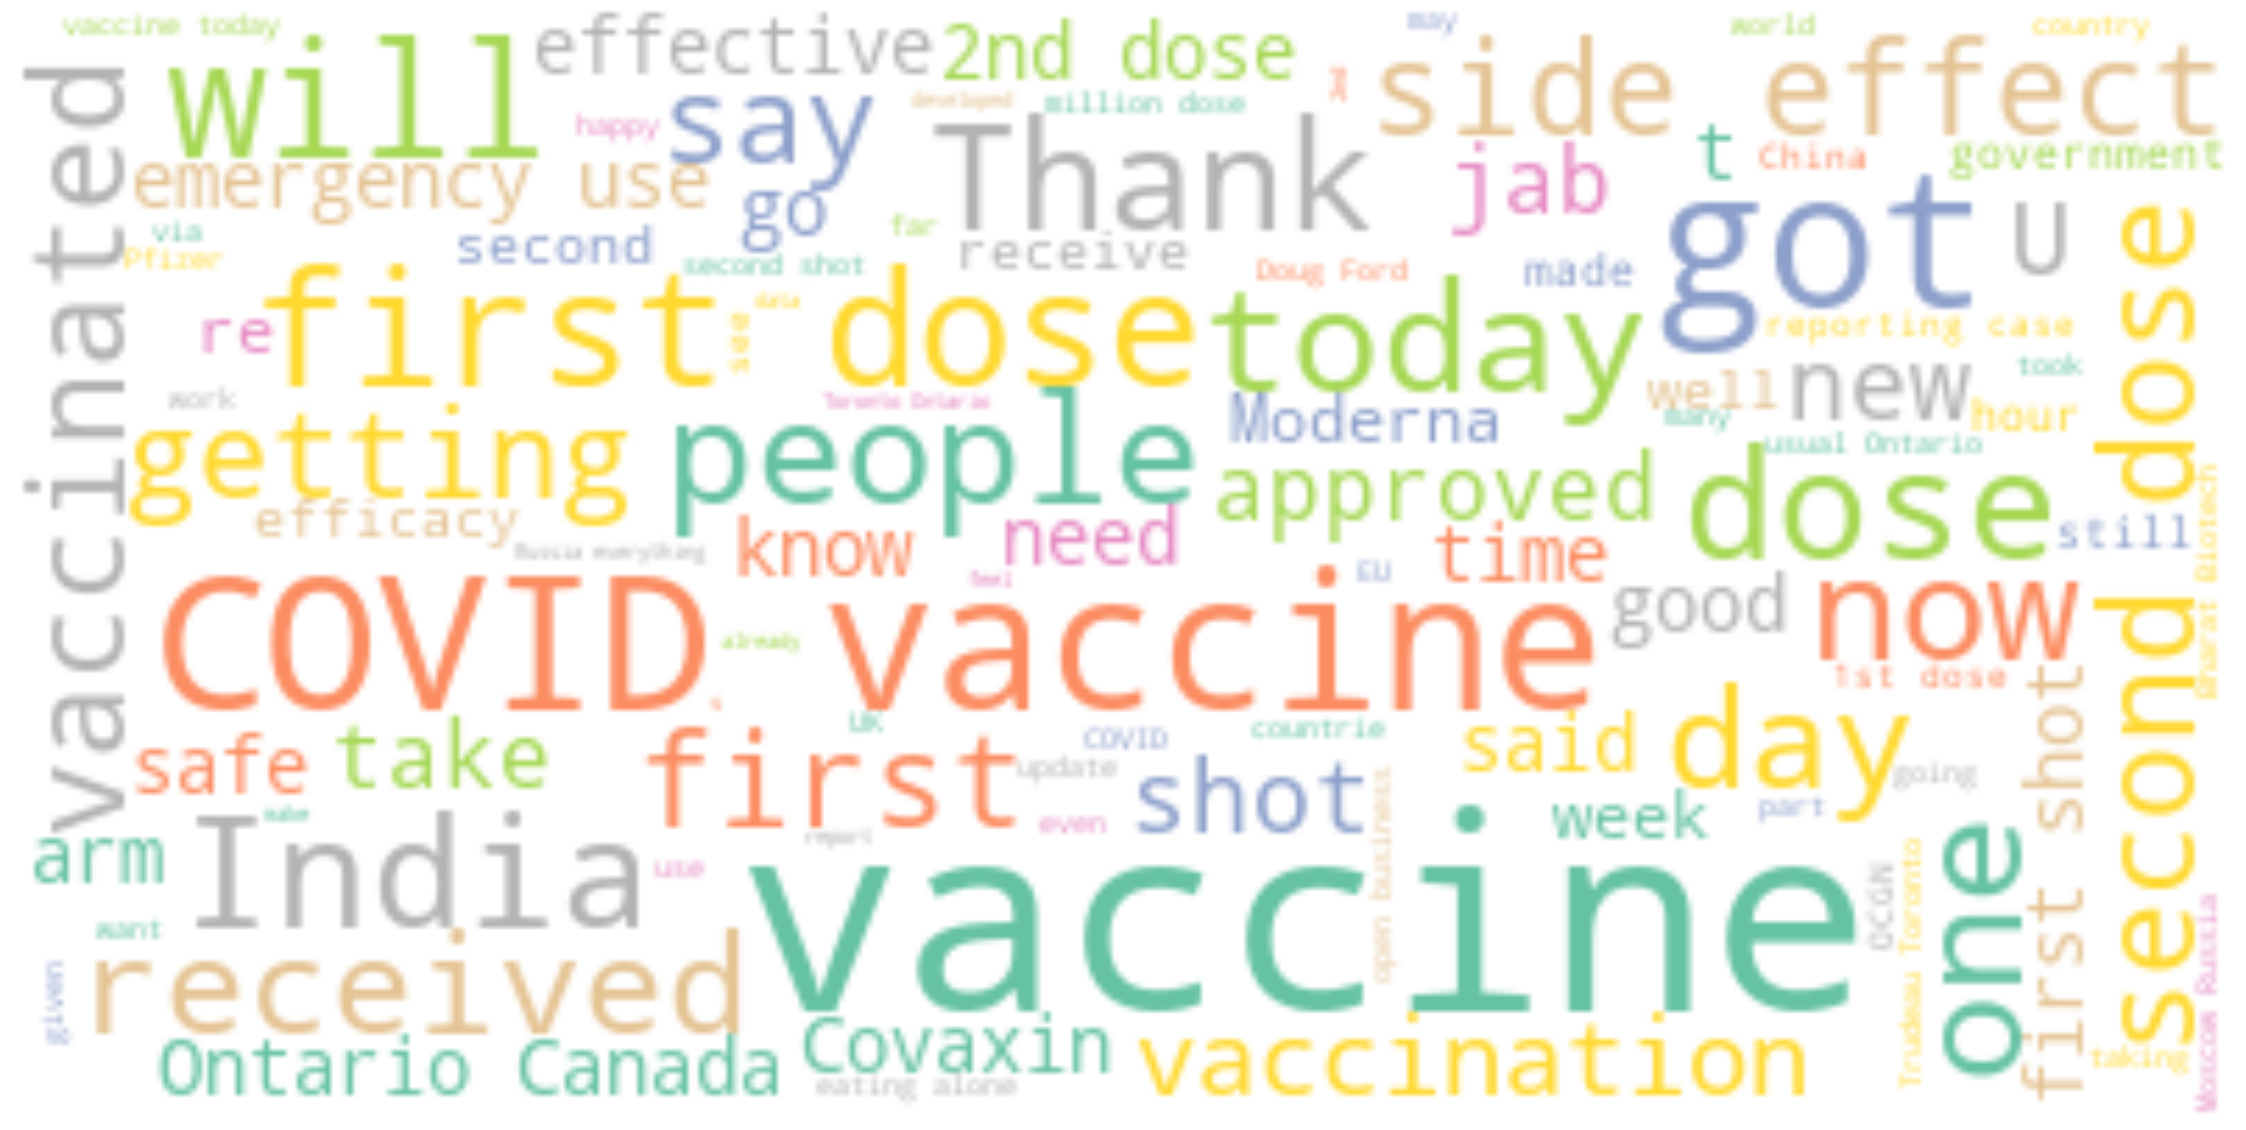

In [91]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color='white', colormap='Set2', random_state = 2, stopwords = STOPWORDS).generate(tweet_All)

# Plot
plot_cloud(wordcloud)